## Preprocessing

In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_value_counts = application_df['APPLICATION_TYPE'].value_counts()
app_type_value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value1 = 500
application_types_to_replace =app_type_value_counts[app_type_value_counts < cutoff_value1].index.tolist()
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [6]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_value_counts =  application_df['CLASSIFICATION'].value_counts()
class_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_value_counts_above1 = class_value_counts[class_value_counts > 1]
class_value_counts_above1


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value2 = 1000
classifications_to_replace = class_value_counts[class_value_counts < cutoff_value2].index.tolist()
classifications_to_replace


['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [10]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`

# List of categorical columns to be transformed
categorical_columns = ['INCOME_AMT','APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'SPECIAL_CONSIDERATIONS']

# Use get_dummies to transform the categorical columns
application_df = pd.get_dummies(application_df, columns=categorical_columns)
application_df


,STATUS,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,108590,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
34295,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
34296,1,5000,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
34297,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [13]:
application_df.dtypes

STATUS                          int64
ASK_AMT                         int64
IS_SUCCESSFUL                   int64
INCOME_AMT_0                    uint8
INCOME_AMT_1-9999               uint8
INCOME_AMT_10000-24999          uint8
INCOME_AMT_100000-499999        uint8
INCOME_AMT_10M-50M              uint8
INCOME_AMT_1M-5M                uint8
INCOME_AMT_25000-99999          uint8
INCOME_AMT_50M+                 uint8
INCOME_AMT_5M-10M               uint8
APPLICATION_TYPE_Other          uint8
APPLICATION_TYPE_T10            uint8
APPLICATION_TYPE_T19            uint8
APPLICATION_TYPE_T3             uint8
APPLICATION_TYPE_T4             uint8
APPLICATION_TYPE_T5             uint8
APPLICATION_TYPE_T6             uint8
APPLICATION_TYPE_T7             uint8
APPLICATION_TYPE_T8             uint8
AFFILIATION_CompanySponsored    uint8
AFFILIATION_Family/Parent       uint8
AFFILIATION_Independent         uint8
AFFILIATION_National            uint8
AFFILIATION_Other               uint8
AFFILIATION_

In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns = ['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Define the number of features
n_features = len(X.columns)
n_features

43

In [17]:
# Add our first Dense layer, including the input layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5981 (23.36 KB)
Trainable params: 5981 (23.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5716 - accuracy: 0.7194
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5525 - accuracy: 0.7311
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7305
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7320
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7322
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7333
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5463 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7400
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7395
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7388
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7393
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7403
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7396
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7390
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7400
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7390
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 

<Figure size 800x500 with 0 Axes>

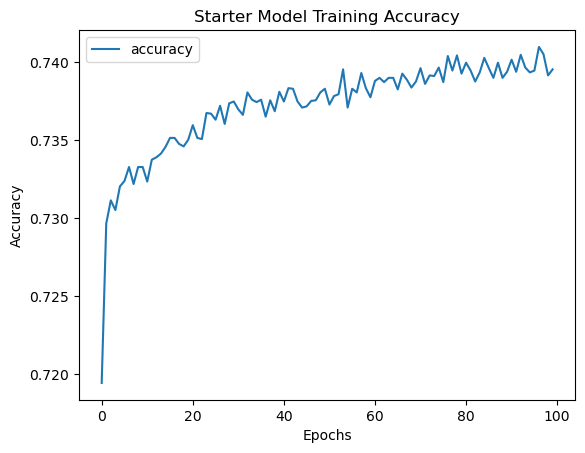

In [25]:
# Plotting and saving the training accuracy
plt.figure(figsize=(8, 5))
accuracy_df = pd.DataFrame(fit_model.history)
accuracy_df.plot(y="accuracy")
plt.title('Starter Model Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5586 - accuracy: 0.7289 - 317ms/epoch - 1ms/step
Loss: 0.5586265325546265, Accuracy: 0.728863000869751


In [21]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

C:\Users\joann\anaconda3\envs\bootcamp\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
